# Experiment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp1'

In [2]:
# Number of parameters [multivariate forecast, univariate forecast] * 10^6
number_of_parameters = {
    "Autoformer":   [10.52, 10,51],
    "Informer":     [11.32, 11.31],
    "LSTM_min_24":  [4.25, 4.22],
    "LSTM_max_720": [5.32, 4.58],
    "Transformer":  [10.53, 10.52]
}
targets = ["multi", "load", "solar", "wind"] 
horizons = ['24', '96', '192', '336', '720']  
models = ['iTransformer', 'PatchTST', 'Autoformer', 'Informer', 'Transformer', 'TSMixer', 'DLinear', "LSTM", "XGBoost", "Linear Regression", "Dummy"]  
metrics = ['MSE', 'MAE']  

## Import data and plot all benchmark results

In [3]:
benchmark_table_with_dummy = pd.read_csv("./../../results/benchmark_table_Exp1_metrics.csv", header=[0, 1], index_col=[0, 1])
epoch_time_table = pd.read_csv("./../../results/benchmark_table_Exp1_epoch_time.csv", header=[0, 1], index_col=[0, 1])
modelsize_maxmemory_table = pd.read_csv("./../../results/benchmark_table_Exp1_modelsize_maxmemory.csv", header=[0, 1], index_col=[0, 1])
std_table = pd.read_csv("./../../results/benchmark_table_Exp1_std.csv", header=[0, 1], index_col=[0, 1])

skill_table = 1 - benchmark_table_with_dummy/ benchmark_table_with_dummy["Dummy"]

benchmark_table = benchmark_table_with_dummy.drop(columns="Dummy")
epoch_time_table = epoch_time_table.drop(columns="Dummy")
display(benchmark_table_with_dummy)

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/3068994752.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table = benchmark_table_with_dummy.drop(columns="Dummy")
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/3068994752.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  epoch_time_table = epoch_time_table.drop(columns="Dummy")


Model          PatchTST        Autoformer        Informer        Transformer  \
Metric              MSE    MAE        MSE    MAE      MSE    MAE         MSE   
Target Horizon                                                                 
multi  24         0.206  0.272      0.325  0.359    0.215  0.284       0.223   
       96         0.414  0.402      0.566  0.491    0.444  0.447       0.443   
       192        0.468  0.435      0.589  0.501    0.508  0.480       0.483   
       336        0.499  0.456      0.594  0.513    0.512  0.471       0.500   
       720        0.537  0.482      0.636  0.536    0.523  0.475       0.521   
load   24         0.027  0.112      0.047  0.162    0.032  0.130       0.028   
       96         0.066  0.176      0.067  0.194    0.072  0.198       0.054   
       192        0.080  0.198      0.082  0.214    0.079  0.210       0.068   
       336        0.084  0.204      0.103  0.238    0.086  0.219       0.079   
       720        0.091  0.215      0.121  0.259    0.120  0.264       0.111   
solar  24         0.101  0.169      0.125  0.214    0.103  0.165       0.110   
       96         0.165  0.223      0.195  0.273    0.160  0.218       0.173   
       192        0.189  0.239      0.234  0.308    0.192  0.241       0.192   
       336        0.204  0.253      0.318  0.369    0.204  0.251       0.199   
       720        0.228  0.267      0.307  0.368    0.233  0.281       0.208   
wind   24         0.457  0.483      0.610  0.591    0.477  0.505       0.481   
       96         0.942  0.746      1.295  0.877    1.029  0.807       0.987   
       192        1.072  0.811      1.371  0.915    1.143  0.883       1.137   
       336        1.140  0.842      1.393  0.948    1.201  0.909       1.218   
       720        1.197  0.867      1.571  0.974    1.259  0.954       1.232   

Model                 TSMixer        DLinear          LSTM        XGBoost  \
Metric            MAE     MSE    MAE     MSE    MAE    MSE    MAE     MSE   
Target Horizon                                                              
multi  24       0.300   0.278  0.361   0.253  0.321  0.223  0.297   0.240   
       96       0.448   0.442  0.459   0.461  0.444  0.436  0.437   0.455   
       192      0.469   0.503  0.498   0.519  0.475  0.498  0.472   0.513   
       336      0.478   0.521  0.514   0.560  0.498  0.502  0.478   0.533   
       720      0.493   0.553  0.540   0.603  0.527  0.519  0.490   0.544   
load   24       0.119   0.076  0.209   0.050  0.145  0.035  0.129   0.034   
       96       0.171   0.138  0.285   0.093  0.203  0.082  0.199   0.061   
       192      0.191   0.133  0.278   0.110  0.224  0.094  0.218   0.070   
       336      0.214   0.186  0.341   0.126  0.246  0.099  0.229   0.077   
       720      0.254   0.199  0.353   0.149  0.279  0.131  0.271   0.091   
solar  24       0.169   0.129  0.214   0.117  0.177  0.106  0.172   0.154   
       96       0.229   0.178  0.262   0.180  0.219  0.182  0.235   0.238   
       192      0.246   0.189  0.259   0.210  0.239  0.205  0.255   0.262   
       336      0.251   0.199  0.277   0.235  0.256  0.214  0.261   0.280   
       720      0.259   0.212  0.290   0.295  0.302  0.221  0.269   0.294   
wind   24       0.516   0.500  0.527   0.448  0.474  0.469  0.507   0.545   
       96       0.810   0.923  0.763   0.922  0.727  0.934  0.750   1.095   
       192      0.891   1.037  0.823   1.052  0.791  1.023  0.806   1.231   
       336      0.927   1.108  0.849   1.122  0.825  1.081  0.847   1.262   
       720      0.932   1.148  0.871   1.178  0.852  1.116  0.871   1.283   

Model                 Linear Regression         Dummy         
Metric            MAE               MSE    MAE    MSE    MAE  
Target Horizon                                                
multi  24       0.280             0.203  0.273  0.864  0.656  
       96       0.402             0.400  0.407  0.861  0.654  
       192      0.431             0.465  0.450  0.857  0.653  
       33

# Plot again but highlight best value

In [4]:
def highlight_min(s):
    '''
    Highlight the minimum in a Series green.
    '''
    s_mse = s.xs("MSE", axis=0, level=1)
    is_min_mse = s_mse == s_mse.min()
    s_mae = s.xs("MAE", axis=0, level=1)
    is_min_mae = s_mae == s_mae.min()

    is_min = s.copy()
    
    is_min.loc[:,"MSE"] = is_min_mse.values
    is_min.loc[:,"MAE"] = is_min_mae.values

    return ['background-color: green' if v else '' for v in is_min]

styled_df = benchmark_table.style.apply(highlight_min, axis=1)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False False False False  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False False  True False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True False False False Fa

## Skill table for dummy, where skill = 1 - MSE_model / MSE_dummy

In [5]:
def color_scale(val):
    # Normalize the value to the range [0, 1] from the original range of [-1, 1]
    normalized = (val + 0.7) / 2
    # Convert to RGB color
    red = 190 * (1 - normalized)
    green = 255 * normalized
    blue = 50
    return f'background-color: rgb({int(red)}, {int(green)}, {blue})'

styled_df = skill_table.style.applymap(color_scale)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/2519770715.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = skill_table.style.applymap(color_scale)


## Skill table for linear regression, where skill = 1 - MSE_model / MSE_lr

In [6]:
skill_table2 = 1 - benchmark_table/benchmark_table["Linear Regression"]
styled_df_2 = skill_table2.style.applymap(color_scale)
styled_df_2

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_84297/1327961144.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df_2 = skill_table2.style.applymap(color_scale)


## Epochs and time needed for training

In [7]:
epoch_time_table

Model          PatchTST           Autoformer           Informer            \
Metric           epochs time[min]     epochs time[min]   epochs time[min]   
Target Horizon                                                              
multi  24            25        14          9        12        9         7   
       96            20        11          5         8        6         6   
       192           18        10          6        12        6         7   
       336           18        10          7        18        7        10   
       720           19        12          6        27        6        13   
load   24            82        42          7         9       13        10   
       96            48        25         10        15       10        10   
       192           36        20          8        15       10        11   
       336           58        93          6        17        9        12   
       720           53       198          5        23        5        10   
solar  24            40        20          8        10       14        11   
       96            30        16          6        11       12        11   
       192           29        15          6        14        8         8   
       336           26        14          6        34        7        10   
       720           31        17          6        27        5        10   
wind   24            16         8          8        51        7        22   
       96            15         8          4         8        6        39   
       192           13         7          5        15        4        13   
       336           14         8          5        19        4        16   
       720           16         9          4        20        4         9   

Model          Transformer           TSMixer           DLinear            \
Metric              epochs time[min]  epochs time[min]  epochs time[min]   
Target Horizon                                                             
multi  24                5         3      29        13      25         7   
       96                4         3      31        16      24         7   
       192               4         4      19        11      22         7   
       336               4         5      17        11      21         7   
       720               4         9      20        17      31        12   
load   24                8         5      26         9      25         7   
       96                5         4      23         8      30         9   
       192               5         4      19         7      27         8   
       336               5         6      21         8      23         7   
       720               4         9      19         7      20         7   
solar  24                9         5      21         7      35        10   
       96                5         4      30        10      36        12   
       192               4         3      24         8      29         9   
       336               4         4      24         9      29         9   
       720               4         9      26        10      30        12   
wind   24                5         3      24         8      25         8   
       96                4         3      21         8      19         7   
       192               4         3      17         7      20        39   
       336               4         4      17        32      25        56   
       720               4         9      19        19      20        19   

Model            LSTM           XGBoost           Linear Regression            
Metric         epochs time[min]  epochs time[min]            epochs time[min]  
Target Horizon                                                                 
multi  24           5         2       -         0                 -         0  
       96           5         3       -         2                 -         0  
       192          5         3       -         3                 -         0  

In [8]:
modelsize_maxmemory_table

Model              PatchTST               Autoformer                 Informer  \
Metric         params[Mio.] max_mem[MB] params[Mio.] max_mem[MB] params[Mio.]   
Target Horizon                                                                  
multi  24               0.5         160         10.5        1219         11.3   
       96               0.9         165         10.5        1611         11.3   
       192              1.4         171         10.5        2352         11.3   
       336              2.2         181         10.5        3340         11.3   
       720              4.3         207         10.5        6312         11.3   
load   24               0.5          68         10.5        1219         11.3   
       96               0.9          73         10.5        1610         11.3   
       192              1.4          80         10.5        2352         11.3   
       336              2.2          91         10.5        3340         11.3   
       720              4.3         123         10.5        6310         11.3   
solar  24               0.5          68         10.5        1219         11.3   
       96               0.9          73         10.5        1611         11.3   
       192              1.4          80         10.5        2352         11.3   
       336              2.2          91         10.5        3340         11.3   
       720              4.3         123         10.5        6311         11.3   
wind   24               0.5          68         10.5        1219         11.3   
       96               0.9          73         10.5        1611         11.3   
       192              1.4          80         10.5        2353         11.3   
       336              2.2          91         10.5        3340         11.3   
       720              4.3         123         10.5        6311         11.3   

Model                       Transformer                  TSMixer              \
Metric         max_mem[MB] params[Mio.] max_mem[MB] params[Mio.] max_mem[MB]   
Target Horizon                                                                 
multi  24              601         10.5         693          0.4         111   
       96              670         10.5         817          0.4         112   
       192             854         10.5        1114          0.5         112   
       336            1140         10.5        1640          0.5         117   
       720            1886         10.5        3489          0.6         136   
load   24              601         10.5         694          0.4         109   
       96              669         10.5         816          0.4         110   
       192             854         10.5        1114          0.5         110   
       336            1138         10.5        1640          0.5         111   
       720            1885         10.5        3489          0.6         114   
solar  24              601         10.5         693          0.4         109   
       96              669         10.5         815          0.4         110   
       192             854         10.5        1114          0.5         110   
       336            1138         10.5        1640          0.5         111   
       720            1885         10.5        3489          0.6         114   
wind   24              600         10.5         694          0.4         109   
       96              669         10.5         816          0.4         110   
       192             854         10.5        1113          0.5         110   
       336            1138         10.5        1640          0.5         111   
       720            1886         10.5        3489          0.6         114   

Model               DLinear                     LSTM                  XGBoost  \
Metric         params[Mio.] max_mem[MB] params[Mio.] max_mem[MB] params[Mio.]   
Target Horizon                                                                  
multi  24               0.0          18          4.2

In [9]:
std_table

Model          PatchTST         Autoformer         Informer          \
Metric          std_MSE std_MAE    std_MSE std_MAE  std_MSE std_MAE   
Target Horizon                                                        
multi  24         0.001   0.002      0.076   0.036    0.001   0.001   
       96         0.002   0.003      0.019   0.009    0.005   0.008   
       192        0.003   0.001      0.010   0.009    0.003   0.011   
       336        0.001   0.000      0.010   0.012    0.009   0.008   
       720        0.004   0.003      0.018   0.007    0.005   0.006   
load   24         0.000   0.000      0.003   0.006    0.001   0.001   
       96         0.000   0.001      0.002   0.004    0.002   0.003   
       192        0.000   0.001      0.006   0.010    0.004   0.005   
       336        0.002   0.003      0.012   0.014    0.002   0.004   
       720        0.001   0.001      0.009   0.009    0.012   0.014   
solar  24         0.000   0.001      0.006   0.008    0.001   0.001   
       96         0.001   0.001      0.010   0.016    0.001   0.001   
       192        0.002   0.002      0.004   0.011      0.0   0.003   
       336        0.000   0.002      0.049   0.047    0.001   0.004   
       720        0.002   0.002      0.012   0.016    0.005   0.006   
wind   24         0.003   0.003      0.015   0.005    0.007   0.006   
       96         0.002   0.001      0.008   0.006    0.011   0.004   
       192        0.003   0.001      0.038   0.011    0.021   0.015   
       336        0.002   0.002      0.025   0.010    0.023   0.031   
       720        0.003   0.001      0.018   0.019        -       -   

Model          Transformer         TSMixer         DLinear            LSTM  \
Metric             std_MSE std_MAE std_MSE std_MAE std_MSE std_MAE std_MSE   
Target Horizon                                                               
multi  24            0.003   0.002   0.027   0.030   0.000   0.000   0.001   
       96            0.004   0.004   0.020   0.018   0.000   0.000   0.004   
       192           0.003   0.003   0.044   0.037   0.000   0.000   0.020   
       336           0.001   0.003   0.025   0.024   0.000   0.001   0.013   
       720           0.010   0.005   0.006   0.006   0.000   0.000   0.012   
load   24            0.001   0.002   0.017   0.031   0.000   0.000   0.000   
       96            0.002   0.006   0.058   0.069   0.000   0.000   0.005   
       192           0.003   0.007   0.028   0.035   0.000   0.000   0.005   
       336           0.004   0.008   0.027   0.028   0.000   0.000   0.003   
       720           0.004   0.006   0.041   0.042   0.000   0.000   0.005   
solar  24            0.002   0.004   0.004   0.012   0.000   0.000   0.001   
       96            0.002   0.012   0.003   0.010   0.000   0.000   0.002   
       192           0.002   0.002   0.002   0.001   0.000   0.000   0.005   
       336           0.000   0.002   0.002   0.006   0.000   0.000   0.001   
       720           0.001   0.002   0.003   0.003   0.000   0.000   0.003   
wind   24            0.011   0.013   0.005   0.006   0.000   0.000   0.005   
       96            0.011   0.011   0.008   0.007   0.001   0.000   0.002   
       192           0.035   0.023   0.011   0.006   0.001   0.000   0.003   
       336           0.022   0.011   0.038   0.016   0.000   0.000   0.003   
       720           0.002   0.002   0.049   0.023   0.001   0.000   0.010   

Model                  XGBoost         Linear Regression           Dummy  \
Metric         std_MAE std_MSE std_MAE           std_MSE std_MAE std_MSE   
Target Horizon                                                             
multi  24        0.004       -       -                 -       -       -   
       96        0.000       -       -                 -       -       -   
       192       0.007       -       -                 -       -       -   
       336       0.004       -       -                 -       -       -   
       720       0.006       -       - 

## Average of columns of benchmarks for MSE and MAE

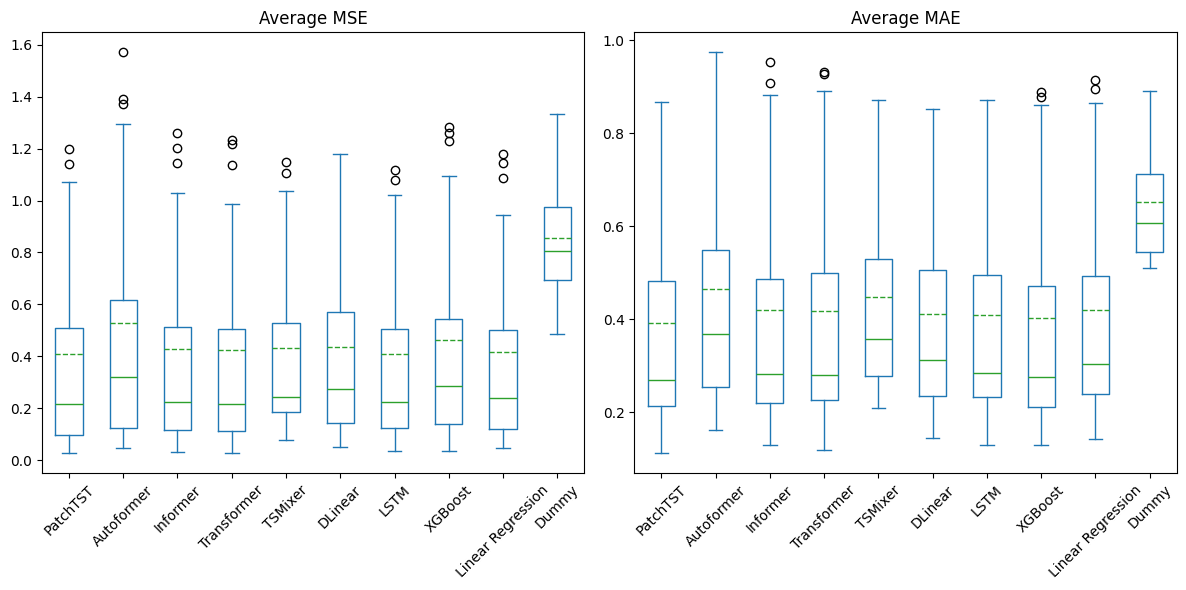

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Average MSE in the first subplot
benchmark_table_with_dummy.xs('MSE', level=1, axis=1).plot(kind="box", title="Average MSE", ax=axes[0], showmeans=True, meanline=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot Average MAE in the second subplot
benchmark_table_with_dummy.xs('MAE', level=1, axis=1).plot(kind="box", title="Average MAE", ax=axes[1], showmeans=True, meanline=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45) 

plt.tight_layout()
plt.show()

Dashed line is the mean </br> </br>
Solid line is the median

## MSE - horizon plot for each target

In [11]:
bms = []
bms_et = []
for target in targets:
    bm = benchmark_table.xs(target, level=0, axis=0)
    bm_mse = bm.xs('MSE', level=1, axis=1)
    bm_mae = bm.xs('MAE', level=1, axis=1)
    bms.append((bm_mse, bm_mae))

    bm_et = epoch_time_table.xs(target, level=0, axis=0)
    bm_e = bm_et.xs('epochs', level=1, axis=1)
    bm_t = bm_et.xs('time[min]', level=1, axis=1)
    bms_et.append((bm_e, bm_t))

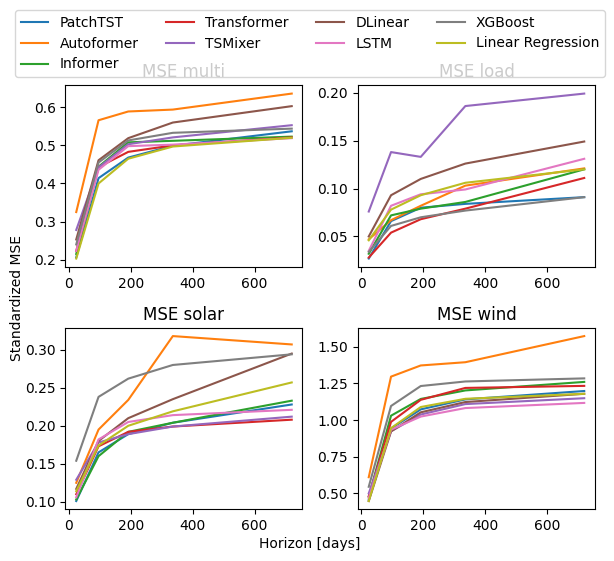

In [12]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))
# Define a list of colors for each model
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#7f7f7f"] # purple: 
#colors= ["#1f77b4", "#17becf", "#2ca02c", "#e377c2","#bcbd22", "#7f7f7f"]

for i, (bm_mse, bm_mae) in enumerate(bms):
    row, col = divmod(i, 2)
    
    
    #ax[row][col].plot(bm_mse, color=colors)
    for j in range(bm_mse.shape[1]):  # Iterate over the columns of bm_mse
        
        
        ax[row][col].plot(bm_mse.iloc[:, j]) #color=colors[j])
    ax[row][col].set_title('MSE ' + targets[i])
fig.legend(models[:-1], loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=4)

fig.text(0.5, 0, 'Horizon [days]', ha='center')
fig.text(0, 0.5, 'Standardized MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()



## MSE - train_time plot for each target and each horizon

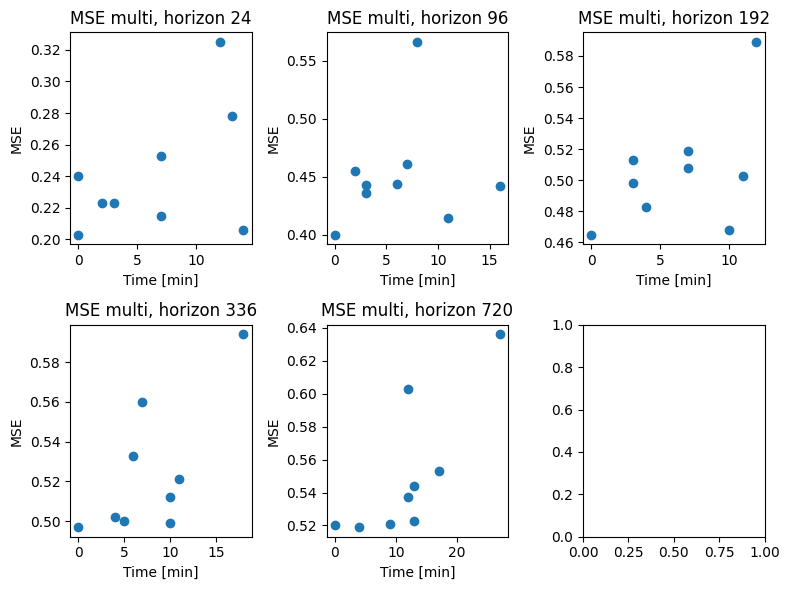

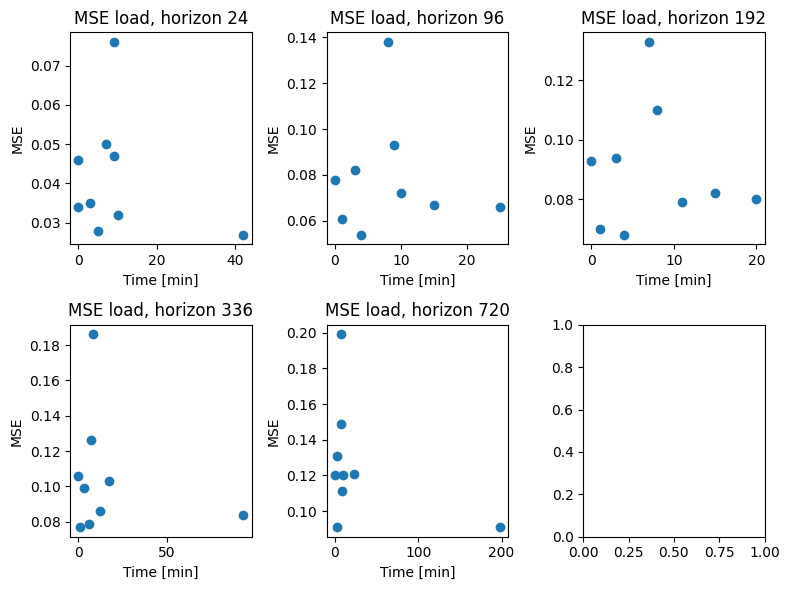

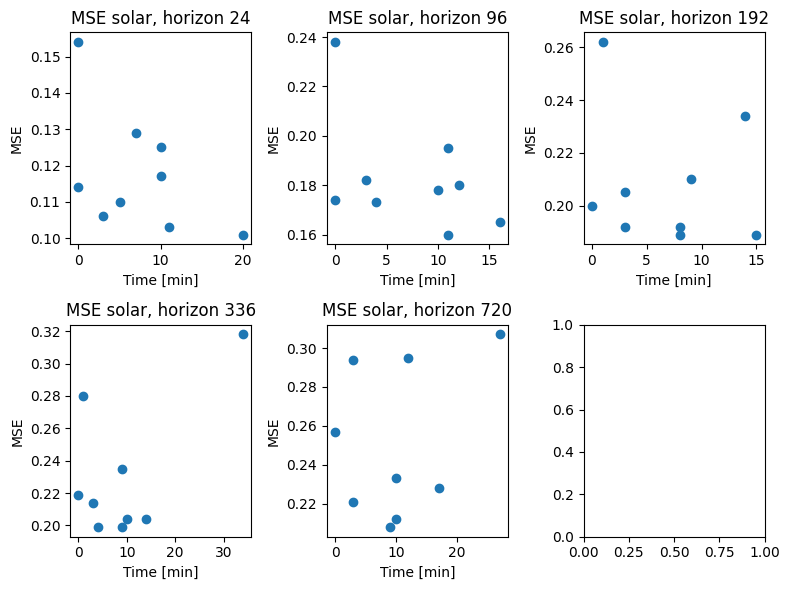

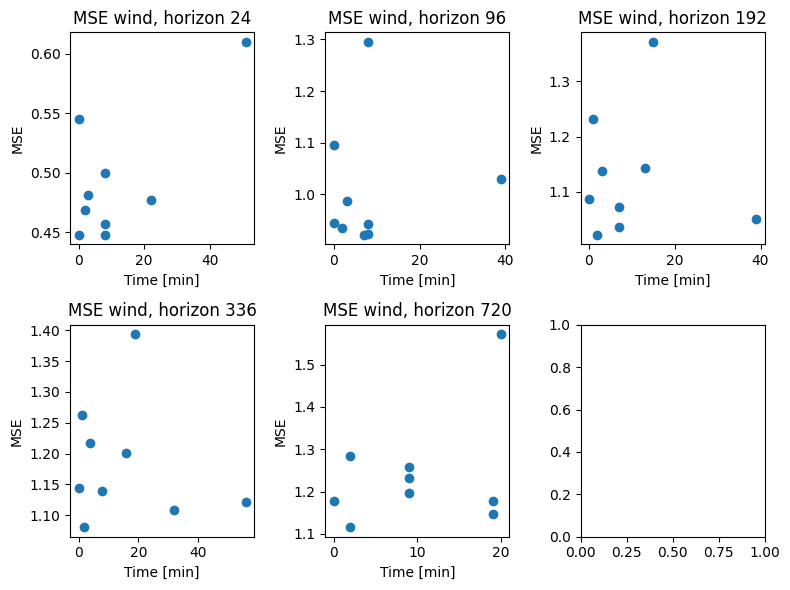

In [13]:
import numpy as np


# For each target
for i, ((bm_mse, bm_mae),(bm_e, bm_t)) in enumerate(zip(bms, bms_et)):
    
    # For each horizon: Plot mse vs time for all models
    fig, ax = plt.subplots(2,3, figsize=(8, 6))
    for j, horizon in enumerate(horizons):
        row, col = divmod(j, 3)
        ax[row][col].scatter(bm_t.iloc[j].values, bm_mse.iloc[j].values)# c=colors[:-1])
        ax[row][col].set_title('MSE ' + targets[i] + ', horizon ' + horizons[j])
        ax[row][col].set_xlabel('Time [min]')
        ax[row][col].set_ylabel('MSE')
    fig.tight_layout()
    #fig.legend(models[:-1], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

In [14]:
counts = benchmark_table
b_mse = benchmark_table.xs("MSE", axis=0, level=1)
is_min_mse = b_mse == b_mse.min()
#    s_mae = s.xs("MAE", axis=0, level=1)
#    is_min_mae = s_mae == s_mae.min()####

#    is_min = s.copy()
    
#    is_min.loc[:,"MSE"] = is_min_mse.values
#    is_min.loc[:,"MAE"] = is_min_mae.values

#    return ['background-color: green' if v else '' for v in is_min]

KeyError: 'MSE'